Generated Key: [3288623858, 1244926985, 312569255, 1963510539]


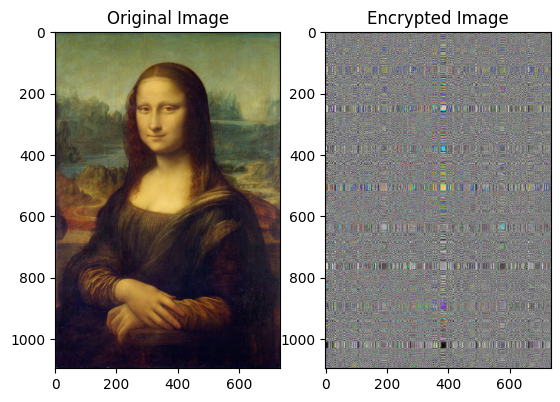

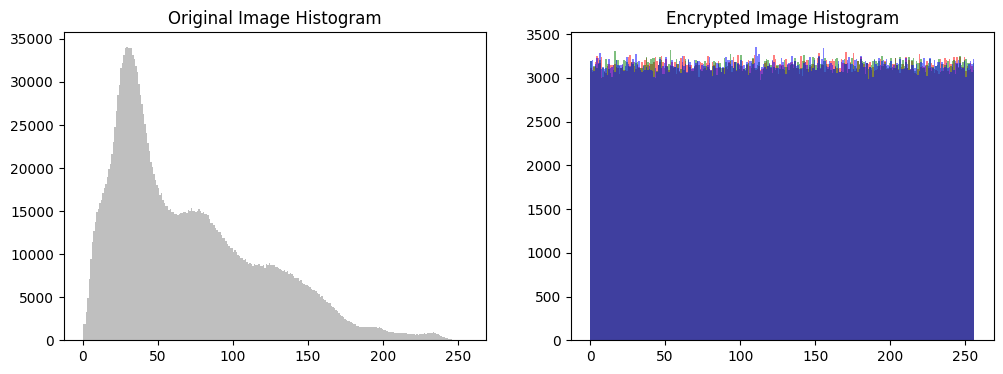

Average Encryption Time: 2.4831 seconds


In [2]:
from PIL import Image
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import time

def fibonacci_sequence(length):
    fib_sequence = [0, 1]
    while len(fib_sequence) < length:
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
    return fib_sequence[:length]

def tribonacci_sequence(length):
    trib_sequence = [0, 1, 2]
    while len(trib_sequence) < length:
        trib_sequence.append(trib_sequence[-1] + trib_sequence[-2] + trib_sequence[-3])
    return trib_sequence[:length]

def generate_key(image_path):
    # Use image path for key generation
    hashed_path = hashlib.sha256(image_path.encode()).digest()
    key = [int.from_bytes(hashed_path[i:i+4], 'big') for i in range(0, 16, 4)]
    return key

def encrypt_image(image_path, key):
    image = Image.open(image_path)
    pixels = np.array(image)

    # Confusion phase (Fibonacci transform)
    start_time = time.time()
    for channel in range(pixels.shape[2]):  # For each color channel
        for i in range(pixels.shape[0]):  # For each row
            pixels[i, :, channel] = np.mod(pixels[i, :, channel] + fibonacci_sequence(pixels.shape[1]), 256)

    # Diffusion phase (Tribonacci transform)
    for channel in range(pixels.shape[2]):  # For each color channel
        for i in range(pixels.shape[1]):  # For each column
            pixels[:, i, channel] = np.mod(pixels[:, i, channel] + tribonacci_sequence(pixels.shape[0]), 256)
    end_time = time.time()

    encrypted_image = Image.fromarray(pixels.astype('uint8'))
    return encrypted_image, end_time - start_time

def decrypt_image(encrypted_image, key):
    pixels = np.array(encrypted_image)

    # Inverse Diffusion phase (Inverse Tribonacci transform)
    for channel in range(pixels.shape[2]):  # For each color channel
        for i in range(pixels.shape[1]):  # For each column
            pixels[:, i, channel] = np.mod(pixels[:, i, channel] - tribonacci_sequence(pixels.shape[0]), 256)

    # Inverse Confusion phase (Inverse Fibonacci transform)
    for channel in range(pixels.shape[2]):  # For each color channel
        for i in range(pixels.shape[0]):  # For each row
            pixels[i, :, channel] = np.mod(pixels[i, :, channel] - fibonacci_sequence(pixels.shape[1]), 256)

    decrypted_image = Image.fromarray(pixels.astype('uint8'))
    return decrypted_image

if __name__ == "__main__":
    # Directly use the provided image path
    image_path = "/content/drive/MyDrive/Image encryption and decryption/28fe579e2cc78ae3a26213cf785629a7.jpg"

    # Generate key using SHA-256
    key = generate_key(image_path)
    print("Generated Key:", key)

    # Encryption
    encrypted_image, encryption_time = encrypt_image(image_path, key)

    # Display original image
    original_image = Image.open(image_path)
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')

    # Display encrypted image
    plt.subplot(1, 2, 2)
    plt.imshow(encrypted_image)
    plt.title('Encrypted Image')

    plt.show()

    # Histogram analysis for original image
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(np.array(original_image).ravel(), bins=256, range=[0, 256], color='gray', alpha=0.5, label='Original')
    plt.title('Original Image Histogram')

    # Histogram analysis for encrypted image
    plt.subplot(1, 2, 2)
    for channel, color in enumerate('rgb'):
        plt.hist(np.array(encrypted_image)[:, :, channel].ravel(), bins=256, range=[0, 256], color=color, alpha=0.5, label=color.capitalize())
    plt.title('Encrypted Image Histogram')

    plt.show()

    # Calculate average execution time
    average_time = (encryption_time) / 2
    print(f"Average Encryption Time: {average_time:.4f} seconds")


# New Section